In [1]:
import tensorflow.keras as tf 

Lenet is the first Neural Network model to be implemented for the Computer Vision task, but it is useful for the grayscale images. It is used for the bank system to identify the handwritten digits. 

In [2]:
# Architecture of LeNet

In [3]:
lenet_model = tf.Sequential()

In [4]:
lenet_model.add(
    tf.layers.Input(shape = (32, 32, 1))
)

In [7]:
lenet_model.add(
    tf.layers.Conv2D(
        kernel_size = (5, 5), strides = (1, 1), activation = 'relu', filters = 6
    )
)

In [9]:
lenet_model.add(
    tf.layers.AveragePooling2D(pool_size = (2, 2), strides = (2, 2))
)

In [10]:
lenet_model.add(
    tf.layers.Conv2D(
        kernel_size = (5, 5), strides = (1, 1), activation = 'relu', filters = 16
    )
)

In [11]:
lenet_model.add(
    tf.layers.AveragePooling2D(pool_size = (2, 2), strides = (2, 2))
)

In [12]:
lenet_model.add(
    tf.layers.Flatten()
)

In [13]:
lenet_model.add(
    tf.layers.Dense(units = 120, activation = 'relu')
)

In [14]:
lenet_model.add(
    tf.layers.Dense(units = 84, activation = 'relu')
)

In [15]:
lenet_model.add(
    tf.layers.Dense(units = 10, activation = 'softmax')
)

In [16]:
lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [17]:
from tensorflow.keras.datasets import mnist

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [20]:
x_train.shape

(60000, 28, 28)

In [36]:
import numpy as np
new_x_train =  []
new_x_test = [ ]
import cv2
import matplotlib.pyplot as plt

for img in x_train :
  img = cv2.resize(img, (32, 32))
  new_x_train.append(img)

for img in x_test :
  img = cv2.resize(img, (32, 32))
  new_x_test.append(img)


In [37]:
x_train = np.array(new_x_train)
x_test = np.array(new_x_test)

In [38]:
x_train.shape

(60000, 32, 32)

In [39]:
x_test.shape

(10000, 32, 32)

In [43]:
import pandas as pd
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [44]:
lenet_model.compile(loss = tf.losses.categorical_crossentropy, metrics = 'accuracy', optimizer = 'adam')

In [46]:
history = lenet_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0451 - val_accuracy: 0.9877
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0334 - accuracy: 0.9899 - val_loss: 0.0443 - val_accuracy: 0.9865
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0466 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0514 - val_accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0526 - val_accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0746 - val_accuracy: 0.9800
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0538 -

In [50]:
vl = history.history['val_loss']
a = history.history['accuracy']
va = history.history['val_accuracy']
l = history.history['loss']

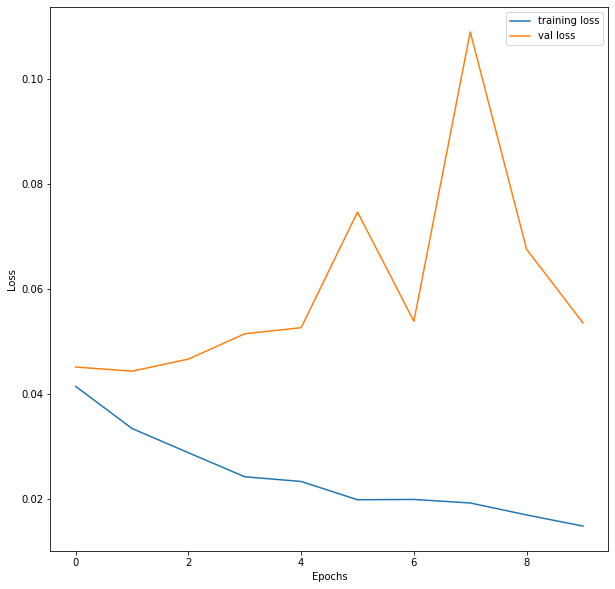

In [53]:
plt.figure(figsize = (10, 10))
plt.plot(range(10), l, label = 'training loss')
plt.plot(range(10), vl, label = 'val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

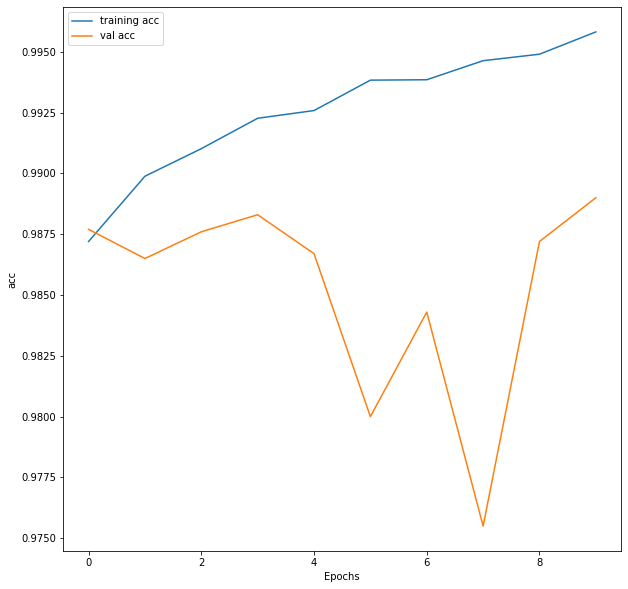

In [54]:
plt.figure(figsize = (10, 10))
plt.plot(range(10), a, label = 'training acc')
plt.plot(range(10), va, label = 'val acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()